#### By: Hong

##### Note: Metpy conflicts cartopy !!!

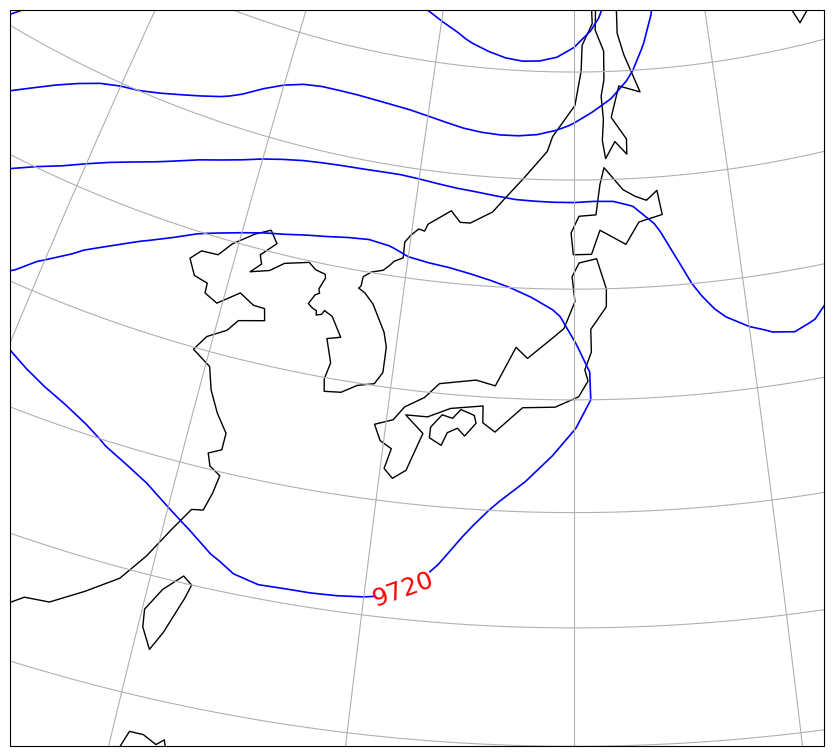

In [4]:
import datetime
from dateutil import tz
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import metpy.calc as mpcalc
import metpy.constants as m_const
from metpy.units import units
import numpy as np
import xarray as xr
import scipy.ndimage as ndimage
import scipy.constants as s_const
import sys
import math

i_year =1961
i_month = 7
i_day = 15
i_hourZ = 18
i_pre=300
i_area = [115, 151, 20, 50]

dlon,dlat=10,10 
levels_reld = [-10, -5, -2, -1, 1, 2, 5, 10]
levels_ws =np.arange(40,300,20)
if (i_pre < 400):
  dd_hgt = 120
elif (i_pre < 700):
  dd_hgt = 60
else:
  dd_hgt = 30

lat_cut=slice(80.0,-20.0)
lon_cut=slice(70.0,190.0)

DataFd=""                                   
yyyymm='{:04d}{:02d}'.format(i_year,i_month)
HgtFn ='{}HGT_{}.nc'.format(DataFd,yyyymm)
                                                                   
ds = xr.open_dataset(HgtFn)

dataHgt = ds.HGT.squeeze()
time_targ=(i_day - 1) * 4 + i_hourZ//6
dataHgt = dataHgt.isel(time=time_targ)
dataHgt = dataHgt.sel(level=i_pre,lat=lat_cut, lon=lon_cut)
dataHgt.attrs['units'] = 'meter'


# ## 時刻文字列化                                  
# UTC = tz.gettz("UTC")
# dt1 = datetime.datetime.fromtimestamp(dataHgt.time.astype(datetime.datetime)*1e-9, tz=UTC)
# dt_str = (dt1.strftime("%HZ%d%b%Y")).upper()
# dt_str2 = dt1.strftime("%Y%m%d%H")
# print(dt_str)
# print(dt_str2)

proj = ccrs.Stereographic(central_latitude=60, central_longitude=140)
latlon_proj = ccrs.PlateCarree()
                                                                     
fig = plt.figure(figsize=(10,8))                                           
plt.rcParams["contour.negative_linestyle"] = 'solid'                                           
plt.subplots_adjust(left=0, right=1, bottom=0.06, top=0.98)                                                                                                  
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_extent(i_area, latlon_proj)
ax.coastlines(resolution='110m')                                           
ax.gridlines()

min_hgt = int(dataHgt.min() / dd_hgt) * dd_hgt
max_hgt = dataHgt.max() + dd_hgt
levels_hgt =np.arange(min_hgt, max_hgt, dd_hgt)
cn_hgt = ax.contour(dataHgt.lon, dataHgt.lat, dataHgt, colors='blue',linewidths=1.2, levels=levels_hgt, transform=latlon_proj )
ax.clabel(cn_hgt, levels_hgt, fontsize=18, inline=True, colors='red',inline_spacing=5, fmt='%i', rightside_up=True)
plt.savefig("Geopotential_height_JRA55.pdf")
plt.show()